In [3]:
parameters_dict = {
    "g_0" : 2,
    "a_0" : 3,
    "a_1" : -100,
    "b" : 0.2,
    "c" : 0.002
}

Currently the method 'set_initial_values' is not implemented, this implies that all the variable and constant initial values were given through the const argument at initialization of the Model class.


Resetting variable colors...
Simulating 1 experiments took: 0.003 s
Plotting 1 experiments
0


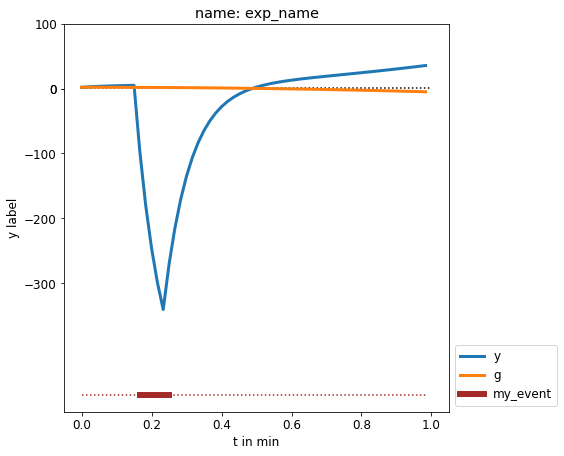

In [4]:
# Imports
from virtual_lab.experiments import Experiment
from virtual_lab.simulation import Simulation
from virtual_lab.model import Model
# Model definition
class MyModel(Model):
    # Define a differential equation
    def diff_equation (self,t):
        y = self.variables.y
        g = self.variables.g
        return self.a[t] - self.b*y - g
    # Define a time dependent function
    def function(self,t):
        return self.g_0 - self.c*t**2
    # Define which variables are influenced by the equations
    def diff_equations_dict(self):
        return {"y": self.diff_equation}
    # Same for time dependent functions
    def equations_dict(self):
        return {"g": self.function}
    # The parameter self.a is time dependent, so we
    # want to define which event in our experiments will cause its
    # variation. By default it is set to self.a_0
    def quantity_dependencies(self):
        return {"a": {"my_event": self.a_1}}
# Now we can initialize the model including the parameter values which 
# we have defined elsewhere. At the same time we can define the initial
# value of our variables.
init_values = {
    "y": 1,
    "g": 10
}
model = MyModel("name", init_values, const = parameters_dict)
# Then we can define an Experiment called "exp_name" which contains
# one event starting at timestep 10 and lasting for 5 timesteps.
# The total duration of the experiment T is 60 timesteps.
my_experiment = Experiment("exp_name", {"my_event": [[10,5]]}, T = 60)
# Now we can initialize the Simulation to manage our model
sim = Simulation(model)
# And run the experiment on our model:
sim.run_experiments(my_experiment)
# Then we can plot the results and save them to disk:
sim.plot_results(filename = "my_results.png",ylabel = "y label")